# Récupération des données

Ce notebook donne quelques exemples de codes qui permettent de récupérer les données utilisées par d'autres notebooks. Le module [actuariat_python](http://www.xavierdupre.fr/app/actuariat_python/helpsphinx/index.html) est implémenté avec Python 3. Pour les utilisateurs de Python 2.7, il suffira de recopier le code chaque fonction dans le notebook (suivre les liens insérés dans le notebook).

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# le code qui suit n'est pas indispensable, il génère automatiquement un menu
# dans le notebook
from jyquickhelper import add_notebook_menu
add_notebook_menu()

Populating the interactive namespace from numpy and matplotlib


### Population française janvier 2017

Les données sont disponibles sur le site de l'INSEE [Pyramide des âges au 1er janvier](https://www.insee.fr/fr/statistiques/1892086?sommaire=1912926). Elles sont disponibles au format Excel. Le format n'est pas le plus simple et il a le don d'être parfois illisible avec pandas. Le plus simple est de le convertir au format texte avec Excel.

In [ ]:
url = "https://www.insee.fr/fr/statistiques/fichier/1892086/pop-totale-france.xls"
url = "pop-totale-france.txt"
import pandas
df=pandas.read_csv(url, sep="\t", encoding="latin-1")
df.head(n=5)

,"Population totale par sexe et âge au 1er janvier 2017, France",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Mis à jour : janvier 2017,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,Année de naissance,Âge révolu,Nombre d'hommes,Nombre de femmes,Ensemble
3,2016,0,382 585,364 392,746 977
4,2015,1,390 810,373 164,763 974


In [ ]:
df=pandas.read_csv(url, sep="\t", encoding="latin-1", skiprows=3)
df.head(n=5)

,Année de naissance,Âge révolu,Nombre d'hommes,Nombre de femmes,Ensemble
0,2016,0,382 585,364 392,746 977
1,2015,1,390 810,373 164,763 974
2,2014,2,402 728,386 467,789 195
3,2013,3,405 636,387 097,792 733
4,2012,4,416 074,396 365,812 439


In [ ]:
df.tail(n=5)

,Année de naissance,Âge révolu,Nombre d'hommes,Nombre de femmes,Ensemble
100,1916 ou avant,100 ou plus,3 015,15 617,18 632
101,NaN,Total,32 455 859,34 534 967,66 990 826
102,NaN,NaN,NaN,NaN,NaN
103,Champ : France inclus Mayotte.,NaN,NaN,NaN,NaN
104,"Source : Insee, estimations de population (rés...",NaN,NaN,NaN,NaN


La récupération de ces données est implémentée dans la fonction [population_france_year](http://www.xavierdupre.fr/app/actuariat_python/helpsphinx/actuariat_python/data/population.html#actuariat_python.data.population.population_france_year) :

In [ ]:
from actuariat_python.data import population_france_year
df = population_france_year()

In [ ]:
df.head(n=3)

,naissance,age,hommes,femmes,ensemble
0,2016,0,382585,364392,746977
1,2015,1,390810,373164,763974
2,2014,2,402728,386467,789195


In [ ]:
df.tail(n=3)

,naissance,age,hommes,femmes,ensemble
98,1918,98,2474,10089,12563
99,1917,99,1362,6765,8127
100,1916,100,3015,15617,18632


D'après cette table, il y a plus de personnes âgées de 110 ans que de 109 ans. C'est dû au fait que la dernière ligne aggrège toutes les personnes âgées de plus de 110 ans.

### Table de mortalité 2000-2002 (France)

On utilise quelques raccourcis afin d'éviter d'y passer trop de temps. Les données sont fournis au format Excel à l'adresse : http://www.institutdesactuaires.com/gene/main.php?base=314. La fonction [table_mortalite_france_00_02](http://www.xavierdupre.fr/app/actuariat_python/helpsphinx/actuariat_python/data/population.html#actuariat_python.data.population.table_mortalite_france_00_02) permet de les récupérer.

In [ ]:
from actuariat_python.data import table_mortalite_france_00_02
df=table_mortalite_france_00_02()
df.head()

,Age,Homme,Femme
0,0.0,100000.0,100000.0
1,1.0,99511.0,99616.0
2,2.0,99473.0,99583.0
3,3.0,99446.0,99562.0
4,4.0,99424.0,99545.0


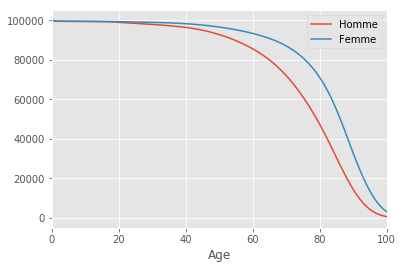

In [ ]:
df.plot(x="Age",y=["Homme", "Femme"],xlim=[0,100])

### Taux de fécondité (France)

On procède de même pour cette table avec la fonction [fecondite_france](http://www.xavierdupre.fr/app/actuariat_python/helpsphinx/actuariat_python/data/population.html#actuariat_python.data.population.fecondite_france). Source : [INSEE : Fécondité selon l'âge détaillé de la mère](http://www.insee.fr/fr/themes/tableau.asp?reg_id=0&ref_id=bilandemo2).

In [ ]:
from actuariat_python.data import fecondite_france
df=fecondite_france()
df.head()

,age,2005,2015
3,15.0,0.1,0.0
4,16.0,0.2,0.2
5,17.0,0.5,0.5
6,18.0,1.0,1.1
7,19.0,2.0,2.1


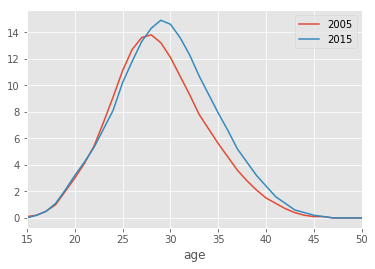

In [ ]:
df.plot(x="age", y=["2005","2015"])

### Table de mortalité étendue 1960-2010

[table de mortalité de 1960 à 2010](http://www.data-publica.com/opendata/7098--population-et-conditions-sociales-table-de-mortalite-de-1960-a-2010) qu'on récupère à l'aide de la fonction [table_mortalite_euro_stat](http://www.xavierdupre.fr/app/actuariat_python/helpsphinx/actuariat_python/data/population.html#actuariat_python.data.population.table_mortalite_euro_stat).

In [ ]:
from actuariat_python.data import table_mortalite_euro_stat 
table_mortalite_euro_stat()

'mortalite.txt'

In [ ]:
import os
os.stat("mortalite.txt")

os.stat_result(st_mode=33206, st_ino=9007199255282328, st_dev=311511962, st_nlink=1, st_uid=0, st_gid=0, st_size=105741052, st_atime=1480548419, st_mtime=1480548432, st_ctime=1480548419)

In [ ]:
import pandas
df = pandas.read_csv("mortalite.txt", sep="\t", encoding="utf8", low_memory=False)
df.head()

,annee,valeur,age,age_num,indicateur,genre,pays
0,2012,0.00000,Y01,1.0,DEATHRATE,F,AD
1,2014,0.00042,Y01,1.0,DEATHRATE,F,AL
2,2009,0.00080,Y01,1.0,DEATHRATE,F,AM
3,2008,0.00067,Y01,1.0,DEATHRATE,F,AM
4,2007,0.00052,Y01,1.0,DEATHRATE,F,AM


In [ ]:
df [ ((df.age=="Y60") | (df.age=="Y61")) & (df.annee == 2000) & (df.pays=="FR") & (df.genre=="F")]

,annee,valeur,age,age_num,indicateur,genre,pays
87406,2000,5.020000e-03,Y60,60.0,DEATHRATE,F,FR
88955,2000,4.860000e-03,Y61,61.0,DEATHRATE,F,FR
485730,2000,2.580000e+01,Y60,60.0,LIFEXP,F,FR
487268,2000,2.490000e+01,Y61,61.0,LIFEXP,F,FR
882568,2000,5.010000e-03,Y60,60.0,PROBDEATH,F,FR
884117,2000,4.850000e-03,Y61,61.0,PROBDEATH,F,FR
1281364,2000,9.949900e-01,Y60,60.0,PROBSURV,F,FR
1282913,2000,9.951500e-01,Y61,61.0,PROBSURV,F,FR
1679610,2000,9.307600e+04,Y60,60.0,PYLIVED,F,FR
1681148,2000,9.261800e+04,Y61,61.0,PYLIVED,F,FR
